# Lec 14:  Visualizing Continuous Distributions
***

We'll need Numpy, Matplotlib, and maybe Pandas for this notebook, so let's load them. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
#from scipy.stats import norm
import scipy.stats as stats
import math
import pandas as pd 
%matplotlib inline

## The Continuous Uniform Distribution with Python
***

For the continuous uniform distribution, $X \sim Uni(a, b)$ the scipy stats module has the following built-in functions:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

 - pdf:  `stats.uniform.pdf(x, a, b-a)`   (This is the probability **Density**. Useful if you want to plot the probability density function). 

 - cdf:  `stats.uniform.cdf(x, a, b-a)`    (Cumulative distribution function, i.e. $P(X \leq x))$

 - rvs:`stats.uniform.rvs(a, b-a, size=n )`  Randomly samples from the Uniform Distribution


### Exercise 1:
Suppose the arrival time of the next bus is uniformly distributed between 5 and 9 minutes.  What is the probability your bus arrives between 5 and 8 minutes?

Calculate and then sketch and shade what this number represents in terms of the PDF.

**SOLUTION**:

By Hand:

The PDF for U(5,9) is given by $f(x) = \frac{1}{9-5}$ for $5\leq x\leq 9$

Thus 
$P(5 \leq X \leq 8) = \int_5^8 \frac{1}{9-5}= \,dx  = \frac{1}{4} \int_5^8 1 \,dx = \frac{1}{4} (3) = \frac{3}{4}$



Using Python, using the CDF function:

In [14]:
stats.uniform.cdf(8, 5, 4)- stats.uniform.cdf(5, 5, 4)

0.75

Text(0, 0.5, 'Probability Per Unit x')

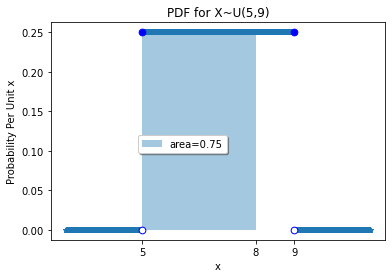

In [24]:
#Plot this

x = np.linspace(3, 11, 1000)
y=stats.uniform.pdf(x,5,4)
plt.plot(x, y,"*")

#Create endpoints of piecewise function;
plt.scatter([5],[1/4], color='blue', s=45, zorder=2, edgecolor='blue')
plt.scatter([5],[0], color='white', s=45, zorder=2, edgecolor='blue')
plt.scatter([9],[1/4], color='blue', s=45, zorder=2, edgecolor='blue')
plt.scatter([9],[0], color='white', s=45, zorder=2, edgecolor='blue')


plt.title("PDF for X~U(5,9)")

labels=[5, 8, 9]
plt.xticks(labels)

plt.fill_between(x, y, where=[(x > 5) and (x < 8) for x in x], label="area=0.75", alpha=0.4)

#place legend where you want it
plt.legend(loc=(.26,.4), shadow=True)
plt.xlabel("x")
plt.ylabel("Probability Per Unit x")

#plt.axhline(color="black")




## The Exponential Distribution with Python
***

Usage note!  Check your documentation!  We have been using the following PDF for the exponential:

$$f(x) = \lambda e^{-\lambda x} \text{  for  } x \in [0, \infty)$$

where $\lambda$ is the **rate** at which events happen.

... but scipy uses a variant that instead has parameter called *scale* that's $1/\lambda$ instead.  See documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

- A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.

They're in the wrong here, but what can we do?  We have to use `scale=1/lambda` for our usage.


###  Calculating probabilities for an exponential distribution
***  

### Exercise 2:
**In an exponential distribution, let $X$= amount of time (in minutes) a postal clerk spends with a customer.   The time is known from historical data to have an average amount of time equal to four minutes, with parameter λ=0.25.    What is the probability that a clerk spends four to five minutes with a randomly selected customer?!**




**YOUR SOLUTION (BY HAND) HERE:**


**Now, let's do this again in Python.**

The scipy stats module has the following built-in functions for the exponential distribution:

 - pdf:  `stats.expon.pdf(x, scale=1/lambda)`

 - cdf:  `stats.expon.cdf(x, scale=1/lambda)`

 - ppf: (for finding percentiles):  `stats.expon.ppf(probability, scale=1/lambda)`

 - rvs:  for randomly sampling from an exponential distribution:  `stats.expon.rvs(samplesize=1000, scale=1/lambda)`



Hint:  Use the built-in exponential cdf function: 
Note that scale = $1/ \lambda = 1/(1/4) = 4$


In [26]:
#Your answer here:
...

Let's visualize this using the graph of the pdf and the `plt.plot` function

Text(0.5, 1.0, 'PDF of X~exp(0.25)')

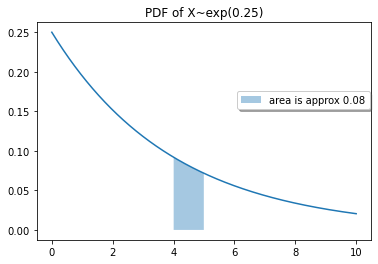

In [25]:
#plot the exponential pdf
x = np.linspace(0, 10, 1000)

y = ...

plt.plot(x,y )
#shade the region between x=4 and x=5:
plt.fill_between(x, stats.expon.pdf(x, scale=4), where=[(x > 4) and (x < 5) for x in x], label='area is approx 0.08', alpha=0.4)


#choose where to position the legend
plt.legend(loc=(.60,.6), shadow=True)

#add title:
plt.title("PDF of X~exp(0.25)")

## The Normal Distribution with Python
***
The built-in functions for the normal distribution with mean = m and standard deviation = s  are given by are given by:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


 - pdf:  `stats.norm.pdf(x, m, s)`  (This is the probability **Density**. Useful if you want to plot the probability density function). 

 - cdf:  `stats.norm.cdf(x, m, s)`  (Cumulative distribution function, i.e. $P(X \leq x))$
 - ppf:`stats.norm.ppf(q, m, s)` (for finding the q*100 percentile) 

 -  rvs: `stats.norm.rvs (m, s, size=n)` or `np.random.normal(m, s, size)`   (to randomly sample from the normal distribution)




### Exercise 3:
Let $X$ be a normal random variable, i.e. $X \sim N(mean = 2,var = 9)$.  

**Part A**: Use scipy.stats.norm to compute

 - i).  $P(X \leq 1.25)$ 

 - ii).  $P(X \geq 4)$. 

In [20]:
# SOLUTION TO PART (i)
...

P(X ≤ 1.25) = 0.401
P(X ≥ 4) = 0.252
1.0


In [ ]:
# SOLUTION TO PART (ii)

**Part B**:  Plot the PDF and shade what your answer above to part (i) represents in terms of the distribution.

Text(0.5, 1.0, 'PDF of X~norm(2, 3)')

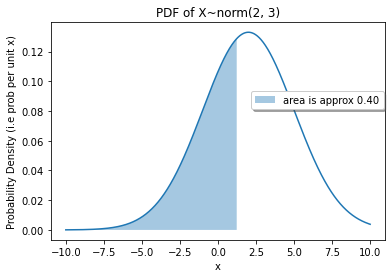

In [8]:
#plot the normal distribution
x = np.linspace(-10, 10, 1000)
y = ...
plt.plot(x, y)

#shade the region between less than x=1.25
plt.fill_between(x, stats.norm.pdf(x, 2, 3), where=[(x < 1.25) for x in x], label='area is approx 0.40', alpha=0.4)


#choose where to position the legend
plt.legend(loc=(.60,.6), shadow=True)
plt.xlabel("x")
plt.ylabel("Probability Density (i.e prob per unit x)")

#add title:
plt.title("PDF of X~norm(2, 3)")

### Exercise 4 - Sampling from the Normal Distribution with Python 
*** 

**Part A**: Draw at least $10000$ samples from the distribution $N(0,1)$ and store the results in a variable called $z$.  Make a density histogram of $z$. Set the $x$-limits for your plot to $[-10,10]$ and your $y$-limits to $[0,0.5]$ so we can compare with the plots we'll generate in **Parts B-D**.

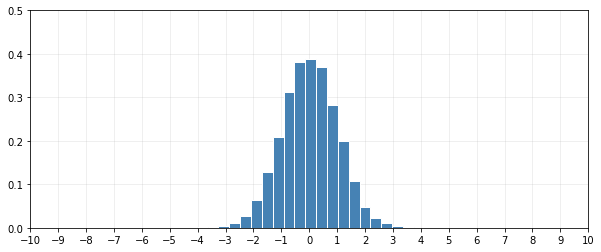

In [21]:
z = ...

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
   #initialize the axis and frame for your picture
pd.Series(z).hist(ax=ax, bins=20, color="steelblue", density=True, edgecolor="white")
   # histogram of the one-dimensional array that contains the 1000 elements in z
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5]);


**Part B**: Look back at the documentation from your function for generating samples from $N(0,1)$.  Modify your code (copy-paste) from **Part A** to draw samples from a normal distribution with parameters $\mu=3$ and $\sigma^2 = 4$, i.e. $N(3,4)$, and store the results in a variable called $x$. Make a density histogram with the same axes limits.  Does your picture seem right based on the changes to the parameters of the distribution? 

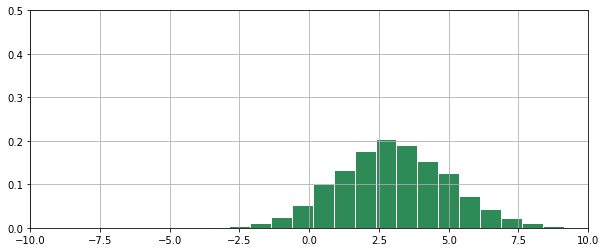

In [14]:
mu = 3
sigma = 2

x = ...

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

pd.Series(x).hist(ax=ax,bins=20,facecolor = "seagreen",edgecolor="white",density=True)

ax.set_xlim([-10,10])
ax.set_ylim([0,0.5]);

**Part C**: Now suppose we are only able to sample from $N(0,1)$.  Could we take those samples and perform a simple transformation so that they're samples from $N(3,4)$? Try a few basic transformations on your array $z$ from **Part A** and store the results in a variable $y$.  Then make a density histogram of $y$ with the same axes limits (again, copy-paste).  Does your histogram based on the transformed data look like the histogram from **Part B**?  

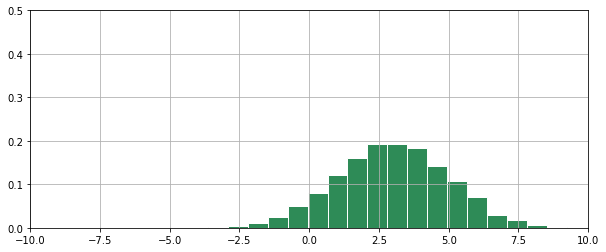

In [15]:
#Using the sample from part A above (this is called z)
y = 2*z+3

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

pd.Series(y).hist(ax=ax,bins=20,facecolor = "seagreen",edgecolor="white",density=True)

ax.set_xlim([-10,10])
ax.set_ylim([0,0.5]);

**Part D**: Okey dokey, going from $N(0,1)$ to $N(3,4)$ was the easy direction, but can you go back the other way.  Can you take the $N(3,4)$ samples you have stored in $v$ from **Part B** and transform them into samples from $N(0,1)$?  Try a few transformations and store them in a variable called $v$ and make a density histogram of your transformed data . Does it look like the plot of sampled $N(0,1)$ data from **Part A**? 

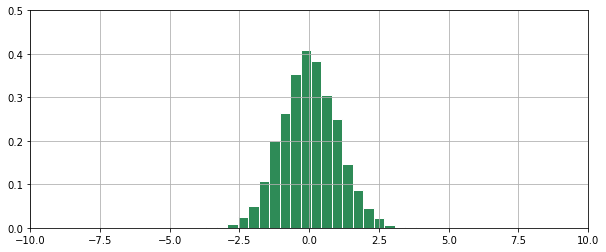

In [17]:
v = (x-3)/2

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

pd.Series(v).hist(ax=ax,bins=20,facecolor = "seagreen",edgecolor="white",density=True)

ax.set_xlim([-10,10])
ax.set_ylim([0,0.5]);

**Part E**: Next let's overlay the density function for $N(3,4)$ over our histogram and check that everything looks good.  Look up the documentation for Scipy.stats's [normal random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The object scipy.stats.norm implements all kinds of cool functions related to the normal distribution, including: pdf, cdf and ppf.  Use the scipy.stats.norm pdf function to plot a density function overlay over your histogram from **Part B**. 

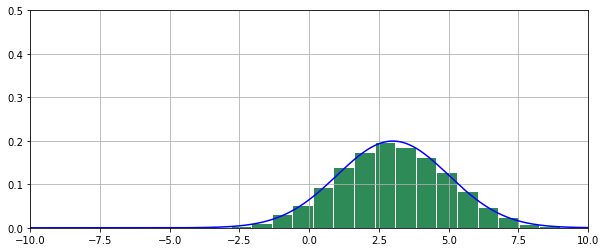

In [18]:
u = np.random.normal(3, 2, size=10000)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

pd.Series(u).hist(ax=ax,bins=20,facecolor = "seagreen",edgecolor="white",density=True)

ax.set_xlim([-10,10])
ax.set_ylim([0,0.5]);

x = np.linspace(-10,10,500)
f = stats.norm.pdf(x,3,2)
ax.plot(x,f,color="blue")

### Exercise 5  - Standard Deviations and Grading Curves
*** 

The following picture depicts the much-often spouted facts in statistics classes that roughly $68\%$ of the probability for a normal distribution falls within 1 standard deviation of the mean, roughly $95\%$ falls within two standard deviations of the mean, etc 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)


**Part A**: Verify the first fact, that roughly $68\%$ of the probability in the standard normal distribution falls between $\mu-\sigma = -1$ and $\mu+\sigma = 1$. 


**Solution**: Let $Z$ be a random variable with standard normal distribution $N(0,1)$.  We have 

In [20]:
...

P(-1 ≤ Z ≤ 1) = 0.6827


Note that for convenience, we used the standard normal distribution here.
<br>But $\color{red}{\text{this relationship holds for any normal distribution}}$.  For instance, if we let $X$ be a normal distribution with mean $\mu = 3$ and standard deviation $\sigma = 2$, then we should be able to check the probability $P(3-2 \leq X \leq 3+2) = P(1 \leq X \leq 5)$ and get the same result.  Let's check: 

In [21]:
...

P(1 ≤ X ≤ 5) = 0.6827


**Part B**: Verify the second fact, that roughly $95\%$ of the probability in the standard normal distribution falls between $\mu-2\sigma = -2$ and $\mu+2\sigma = 2$. 

In [23]:
...

P(-2 ≤ Z ≤ 2) = 0.9545


Similarly, we should obtain the same result for $N(3,4)$ if we compute $P(3-2\cdot 2 \leq X \leq 3+2\cdot 2) = P(-1 \leq X \leq 7)$.

In [24]:
...

P(-1 ≤ X ≤ 7) = 0.9545
P(-1 ≤ X ≤ 7) = 0.9545


**Part C**: Suppose you have grades from a Calculus exam that roughly follow a normal distribution with mean $70$ and standard deviation $15$.  What percentage of the students earned C's and B's (count things like $C$-'s and $B$+'s as $C$'s and $B$'s, etc.)?

**Solution**:

In [25]:
...

P(70 ≤ X ≤ 90) = 0.4088


**Part D**: A common curving scheme in university courses is to set the Pass mark of a class at $\mu - 1.5\sigma$.  That is, if the overall mean of the course is low, instead of holding back people with grades of $69$ or lower, professors will lower the cutoff point to $\mu - 1.5\sigma$.  (Of course, if the mean of the course is higher than usual we don't apply this rule, because we're not monsters). If the grades at the end of a course roughly follow a normal distribution with mean $70$ and standard deviation $15$, what is the cutoff point for passing the class?  What percentage of students will pass the class?  

**Solution**: We have 

In [26]:
...

fail/pass mark = mean - 1.5 x stddev = 47.50
P(X ≥ mean - 1.5 x stddev) = 0.93


SOLUTION:

**Part E**: Repeat the calculations you did in **Parts C** and **E** by first transforming to a standard normal distribution. 

**Solution**: For **Part C** we convert the endpoints of $70$ and $90$ to their standard normal equivalents of 

$$
70 \rightarrow \frac{70-70}{15} = 0 \quad \textrm{and} \quad 90 \rightarrow \frac{90-70}{15} = \frac{4}{3}
$$

We then have 

In [27]:
...

P(0 ≤ Z ≤ 4/3) = 0.4088


**Solution**: For **Part D** we convert the left endpoint of $70-1.5 \times 15$ to 

$$
70 - 1.5 \times 15 \rightarrow \frac{(70-1.5 \times 15) - 70}{15} = -1.5 \quad \textrm{(Is that result mildly obvious?)}
$$

We then have 

In [29]:
...

P(X ≥ - 1.5 ) = 0.93


### Exercise 6 - Sampling from the Standard Normal with Box-Muller 
*** 

If you have to draw samples from a normal distribution in a non-prototyping language you might have to roll your own.  Most languages provide a method for sampling from the uniform distribution $U[0,1]$. In C++, for instance, you can generate draws from $U[0,1]$ as follows

In [ ]:
#include <stdlib.h>

double uniformZeroOne()
{
    return rand() / (RAND_MAX + 1.);
}

The so-called [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) can be used to take random draws from $U[0,1]$ and produce random draws from $N(0,1)$. Look at the Wiki page for Box-Muller and then see if you can implement it.

**Part A**: Write a function box_muller with argument size that implements the Box-Muller transformation by sampling from values in $U[0,1]$ and returns size samples from $N(0,1)$. 


In [30]:
def box_muller(size):
    u1 = np.random.uniform(size=int(size/2))
    u2 = np.random.uniform(size=int(size/2))
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return np.concatenate((z1, z2))


**Part B**: Use your function from **Part A** to draw at least 10000 samples from $N(0,1)$ and make a histogram. Then use norm.pdf to overlay the standard normal density curve over your histogram and check your work. 

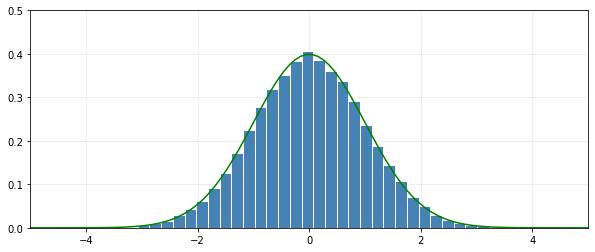

In [32]:
z = box_muller(size=50000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(z).hist(ax=ax, bins=40, color="steelblue", density=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-5,5])
ax.set_ylim([0,.5])
x = np.linspace(-5,5,100)
f = stats.norm.pdf(x)
ax.plot(x, f, color="green");

In [58]:
def shoulda_taken_the_bus(p=.25):
    x = 0 
    y=np.array([1,2,3,4,5])
    for i in y:
        print(i)
        if np.random.choice([0,1], p=[1-p, p]) == 0:
            x += 1 
    return x 




1
2
3
4
5


5

In [63]:
stats.norm.cdf(1.5)

0.9331927987311419

In [3]:
1-stats.f.cdf(2, 3, 14)

0.1603538377468886

In [4]:
1-stats.chi2.cdf(6,2)

0.04978706836786395

In [5]:
stats.norm.cdf(3.66, loc=5, scale=2)

0.2514288950953102

In [6]:
stats.norm.cdf(9,3,2)-stats.norm.cdf(2,3,2)

0.690112563242383

In [51]:
def func(p=.25):
    x=0
    y=np.array([1,2,3,4,5])
    for i in y:
        if np.random.choice([0,1],p=[1-p,p])==0:
            x+=1
    return x

In [26]:
func()

0

In [52]:
output = np.array([func() for ii in range(100000)])

In [53]:
series = pd.Series(output) 
#print(series)

<AxesSubplot:>

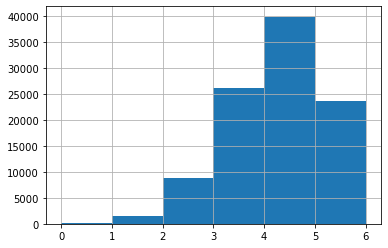

In [54]:
series.hist(bins=[0,1,2,3,4,5,6])